# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

---

In [72]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | conde
Processing Record 2 of Set 1 | chernogorsk
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | cedral
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | tralee
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | chonchi
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | mount isa
Processing Record 14 of Set 1 | klyuchi
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | malaya vishera
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | aripuana
Processing Record

In [73]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [74]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,conde,-7.2597,-34.9075,29.70,62,75,5.14,BR,1702232851
1,chernogorsk,53.8236,91.2842,-31.24,76,20,0.00,RU,1702232851
2,cidreira,-30.1811,-50.2056,21.79,83,96,9.79,BR,1702232851
3,cedral,23.8000,-100.7333,16.99,56,4,3.76,MX,1702232852
4,tiksi,71.6872,128.8694,-23.87,99,100,1.59,RU,1702232852


In [75]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [76]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,conde,-7.2597,-34.9075,29.70,62,75,5.14,BR,1702232851
1,chernogorsk,53.8236,91.2842,-31.24,76,20,0.00,RU,1702232851
2,cidreira,-30.1811,-50.2056,21.79,83,96,9.79,BR,1702232851
3,cedral,23.8000,-100.7333,16.99,56,4,3.76,MX,1702232852
4,tiksi,71.6872,128.8694,-23.87,99,100,1.59,RU,1702232852


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

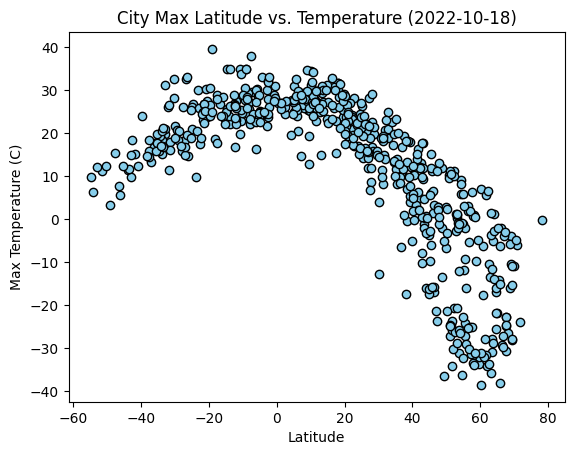

In [90]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', color='skyblue', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

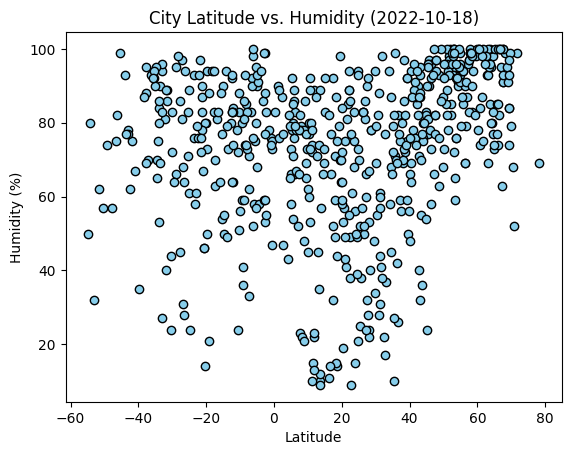

In [93]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', color='skyblue', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

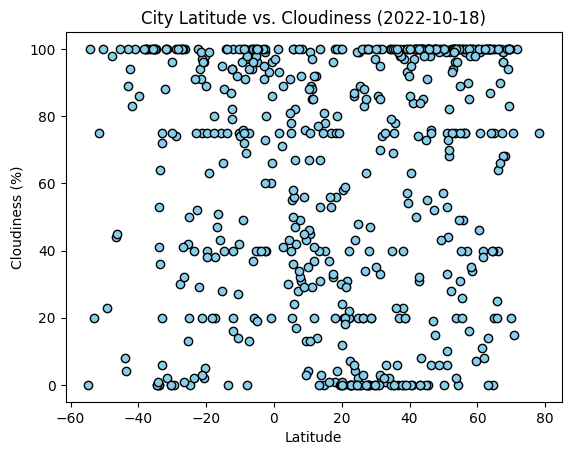

In [94]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', color='skyblue', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

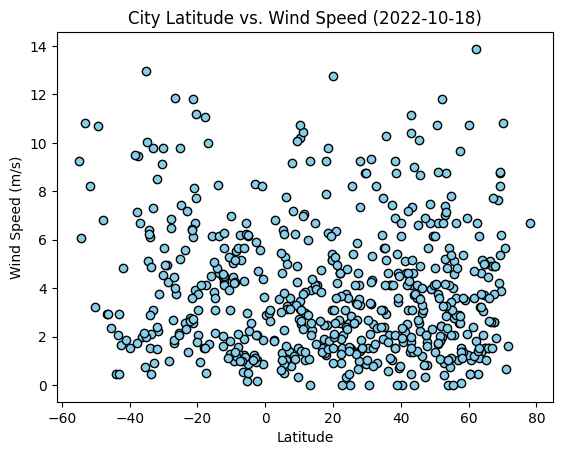

In [95]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', color='skyblue', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [129]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, ylabel_, xyCoords):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    
    # Generate y values based on the regression line
    regression_line = slope * x + intercept
    eqn = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    
    # Plot the data points
    plt.scatter(x, y)
    
    # Plot the regression line
    plt.plot(x, regression_line, 'r-')
    plt.annotate(eqn, xyCoords, fontsize = 15, color = 'red')

    # Add labels
    plt.xlabel('Latitude')
    plt.ylabel(ylabel_)
    
    # Display the plot
    print(f'R value: {rvalue**2}')
    plt.show()

In [130]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chernogorsk,53.8236,91.2842,-31.24,76,20,0.00,RU,1702232851
3,cedral,23.8000,-100.7333,16.99,56,4,3.76,MX,1702232852
4,tiksi,71.6872,128.8694,-23.87,99,100,1.59,RU,1702232852
5,tralee,52.2704,-9.7026,11.14,82,100,11.83,IE,1702232852
6,college,64.8569,-147.8028,-21.72,73,75,1.54,US,1702232852


In [131]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,conde,-7.2597,-34.9075,29.70,62,75,5.14,BR,1702232851
2,cidreira,-30.1811,-50.2056,21.79,83,96,9.79,BR,1702232851
7,chonchi,-42.6128,-73.8092,18.56,62,94,1.65,CL,1702232852
9,puerto natales,-51.7236,-72.4875,11.25,62,75,8.23,CL,1702232853
10,carnarvon,-24.8667,113.6333,26.78,24,0,7.45,AU,1702232853


###  Temperature vs. Latitude Linear Regression Plot

R value: 0.7092332932063605


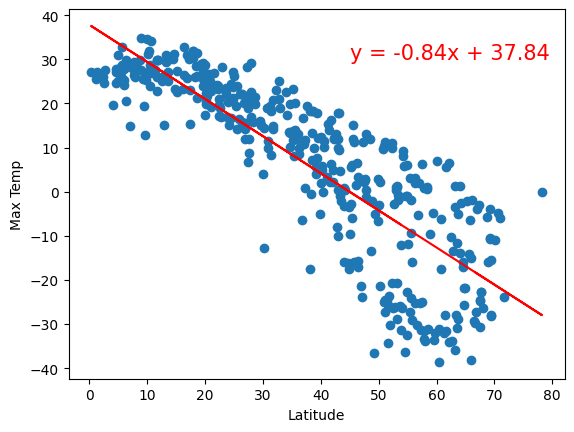

In [132]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df["Max Temp"], 'Max Temp', (45,30))

R value: 0.5048392081350898


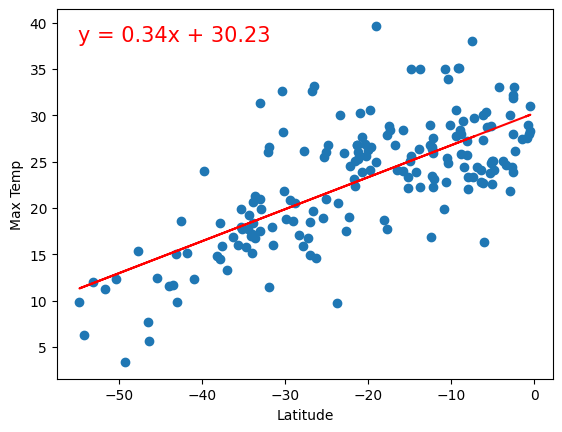

In [142]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df["Max Temp"], 'Max Temp', (-55,38))

**Discussion about the linear relationship:** When comparing the temparature of each city based off of their latitude it appears that in northern hemisphere the temperatures get colder the higher the latitude gets. On the other hand, in the southern hemisphere the temperatures actually get hotter when the latitude gets higher. This indicates that the tempartures are the hottest when the latitude is closest to 0.

### Humidity vs. Latitude Linear Regression Plot

R value: 0.2122577315850215


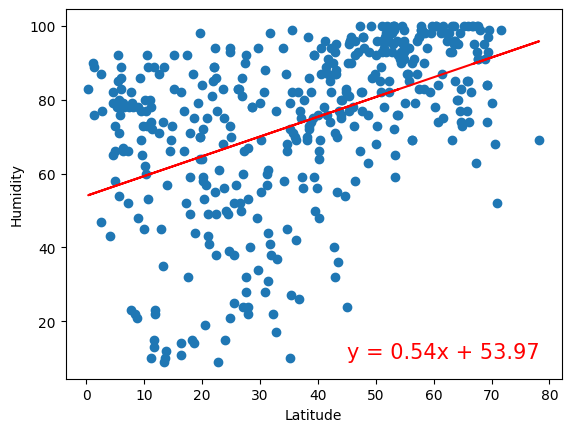

In [145]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', (45,10))

R value: 0.0011271840250114632


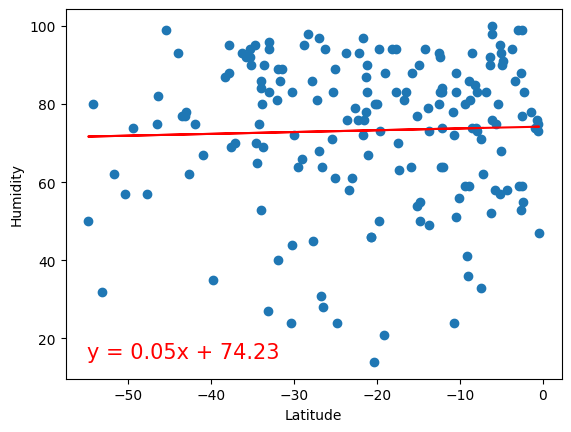

In [148]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', (-55,15))

**Discussion about the linear relationship:** When taking a look at humidity levels of each city compared to their latitude I found that in the northern hemisphere there was a big increase in humidity the higher the latitude was. While the humidity levels still increased for higher latitudes in the southern hemisphere it was a much smaller increase as you can see when comparing the regression lines between the two. However this does still indicate that the higher the latitude of the city, the higher the humidity levels get in both the northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

R value: 0.07433376086867957


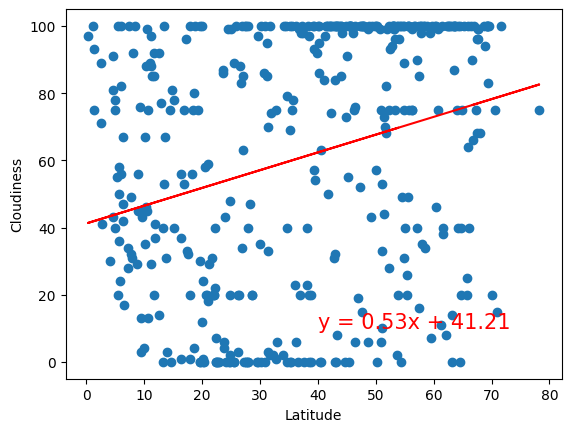

In [159]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', (40,10))

R value: 0.012328938801746516


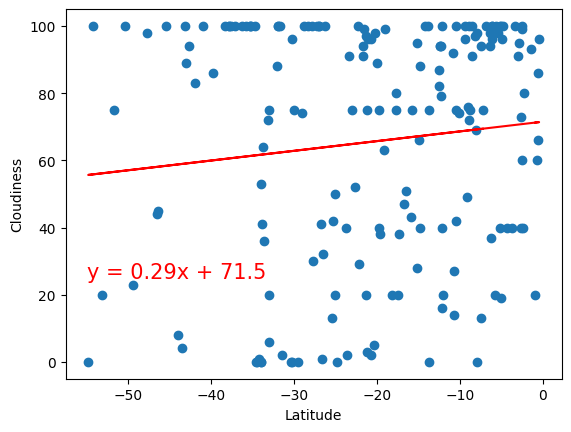

In [160]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', (-55,25))

**Discussion about the linear relationship:** When looking at cloud levels in each city compared to latitude, I found that both the northern and southern hemispheres had similar results. The cloudiness tended to be higher when the latitude was higher for each city as well.

### Wind Speed vs. Latitude Linear Regression Plot

R value: 0.002227164774106442


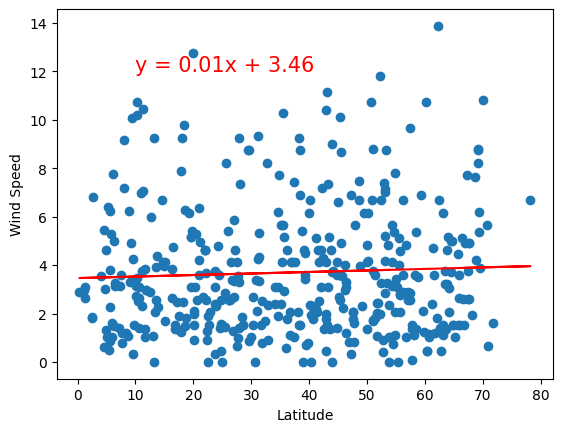

In [164]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', (10,12))

R value: 0.050494483586659415


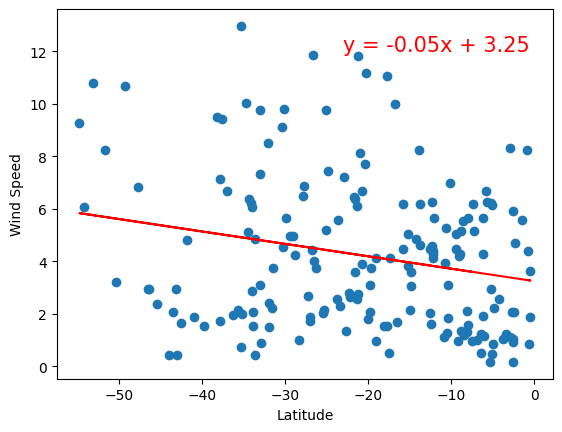

In [171]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', (-23,12))

**Discussion about the linear relationship:** After taking a look at wind levels in both hemispheres it appears that the southern hemisphere has the most affect. The higher the latitude the slower the wind speed would get until it reached the northern hemisphere. Although not by much, the wind speed did the tend to increase slightly northern hemisphere cities when the alitude was higher as well. This showed me that the wind speeds tend to be higher in the southern hemisphere.